In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 第十一週：作業三 (糖尿病數據庫-迴歸預測)

In [58]:
from sklearn.datasets import load_diabetes

In [59]:
diabetes=load_diabetes()

In [60]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [66]:
diabetes_data=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
diabetes_data['disease_progression_one_year_after_baseline']=diabetes.target
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression_one_year_after_baseline
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [69]:
x=diabetes.data
y=diabetes.target

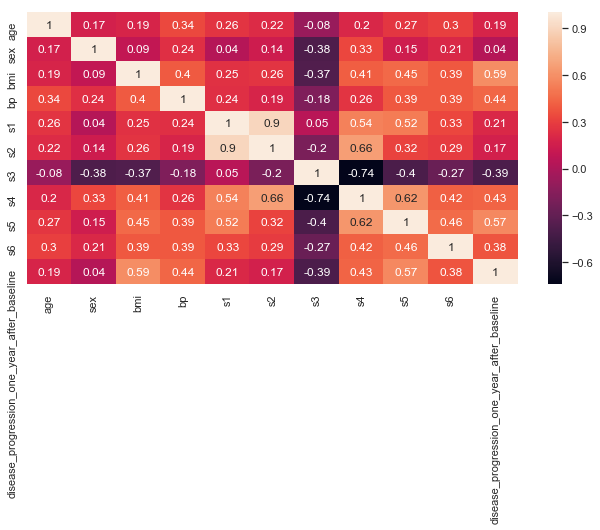

In [70]:
correlation_matrix=diabetes_data.corr().round(2)
sns.set(rc={'figure.figsize':(11,5)})
sns.heatmap(correlation_matrix,annot=True)

In [73]:
X1=diabetes_data.loc[:,["bmi","bp","s4","s5"]].values    #取相關係數大於正負0.4的因素進來預測
X2=diabetes_data.loc[:,"age":"s6"].values                #除了結果以外的全部因素都放進來預測(作為對照組)
Y=diabetes_data.disease_progression_one_year_after_baseline

### 用X1預測

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

y_predict1=model.predict(x_test)

### 用X2預測

In [89]:
x_train,x_test,y_train,y_test=train_test_split(X2,Y,test_size=0.2,random_state=0)

model.fit(x_train,y_train)

y_predict2=model.predict(x_test)

Text(0, 0.5, 'Predict Y')

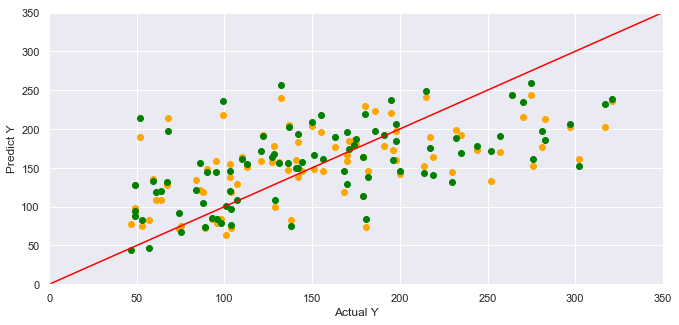

In [100]:
plt.scatter(y_test,y_predict1,c='orange')    #橘色的點是用相關係數大於正負0.4的變數去預測的結果
plt.scatter(y_test,y_predict2,c='green')     #綠色的點是用全部的變數去預測的結果(作為對照組)
plt.xlim(0,350)
plt.ylim(0,350)
plt.plot([0,350],[0,350],'red')
plt.xlabel("Actual Y")
plt.ylabel("Predict Y")

In [ ]:
#看起來用全部變數(綠色)去預測的比用相關係數大於0.4的變數(橘色)去預測的普遍高估比較多一點，但兩者預測的結果差不多，走勢大致符合，但都沒有到非常配適